#### Grism analysis
- 28 March 2022 RLM
- 10 Feb 2023 fix Gaussian fit to auto recognize abs/emission spectra [?]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io.fits import getdata
from scipy.signal import medfilt, medfilt2d
from grism_analysis_lib import grism_tools
import os,sys

In [6]:
# set path to grism file
star_name = 'HD44811'
#star_name = 'HD50064'
base_directory = '/Users/rlm/Dropbox/Gemini/Grism/Feb2023/'
fts_file = base_directory +'HD44811_64s.fts' 
#fts_file = base_directory +'HD50064_64s.fts' 

# Set path to calibration file
cal_directory = '/Users/rlm/Dropbox/Gemini/Grism/Feb2023/'
cal_file = '%s/grism_cal_6_2022_03_25.csv' % cal_directory


# Check if raw grism, calibration files exist
if not os.path.exists(fts_file):
    print('FITS file %s not found, check name/path' % fts_file)

im, hdr = getdata(fts_file, 0, header=True)
grism_filter = hdr['FILTER'][0]
star = hdr['OBJECT']
print('Analyzing image  %s\nGrism filter %s' % (fts_file,grism_filter))

if os.path.exists(cal_file):
    print('Found calibration file %s' % os.path.basename(cal_file))
else:
    print('Calibration file %s not found' % cal_file)
    
# Jacoby Reference file [if it exists, if not, set to '']
ref_file = '/Users/rlm/Dropbox/Gemini/Grism/GRISM_calibration/Jacoby_spectra/%s-Jacoby-spec.csv' % star_name
if  os.path.exists(ref_file):
    print('Found Jacoby reference spectrum: %s' % os.path.basename(ref_file))
else:  
    print('N.B. Jacoby reference spectrum %s does not exist' % ref_file)
    ref_file = ''

Analyzing image  /Users/rlm/Dropbox/Gemini/Grism/Feb2023/HD44811_64s.fts
Grism filter 8
Found calibration file grism_cal_6_2022_03_25.csv
Found Jacoby reference spectrum: HD44811-Jacoby-spec.csv


In [7]:
# Instantiate class

G = grism_tools(fts_file,cal_file,ref_file)
title, star, utdate, myfilter,telescope, instrument = G.header_params()
print(star,utdate,myfilter,telescope,instrument)
print(title)

 2022-03-22 04:46:30 R IRO-Gemini SBIG Aluma AC4040

IRO-Gemini 2022-03-22 04:46:30 grism: R


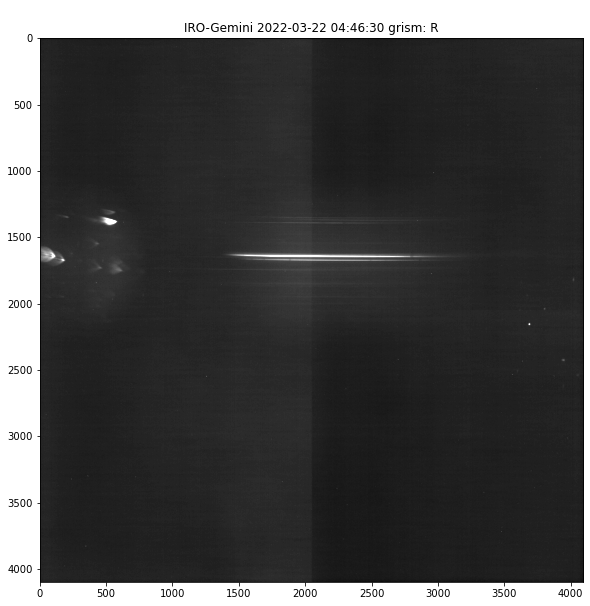

In [8]:
fig = G.plot_image(figsize =(10,10),cmap='gray')

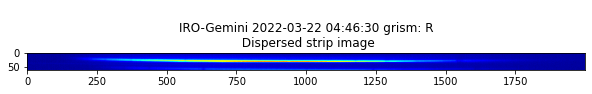

In [9]:
fig = G.plot_strip(cmap='jet')

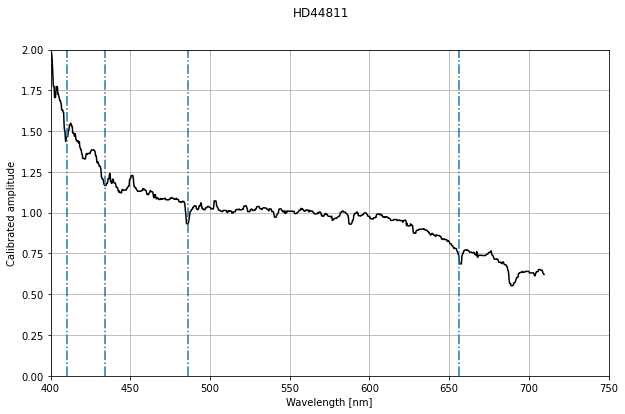

In [10]:
fig = G.plot_spectrum(calibrated =True, plot_balmer=True,title=star_name, xlims =[400,750], ylims =[0.0,2], medavg = 9)

True


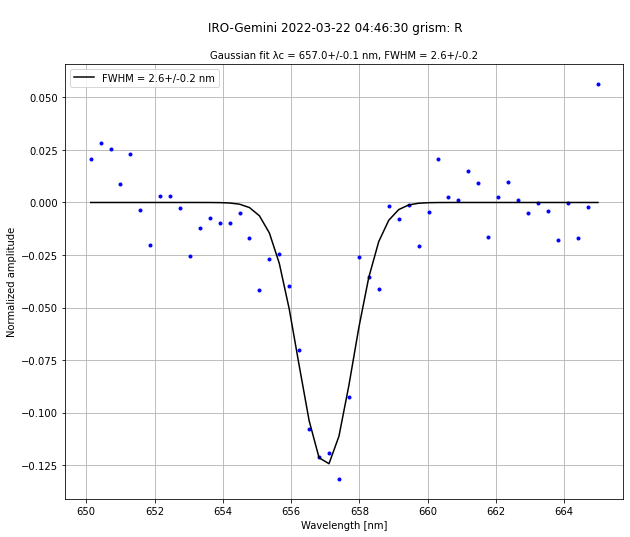

In [11]:
fig, ymod, a, a_err, wave_c, wave_c_err, fwhm, fwhm_err, emission = G.fit_gaussian(650,665, subtract_baseline = True,use_velocity=False)
print(emission)

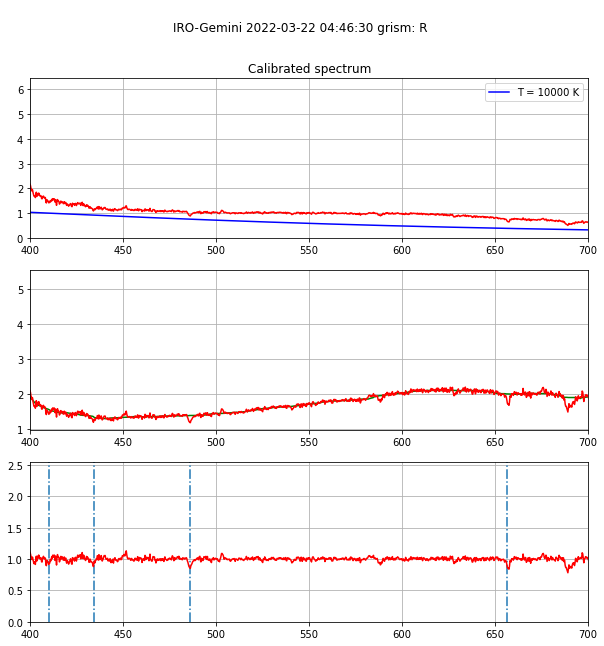

In [12]:
T = 10000
fig = G.plot_rectified_spectrum(T,wavemin=400,wavemax=700)
plt.show(fig)

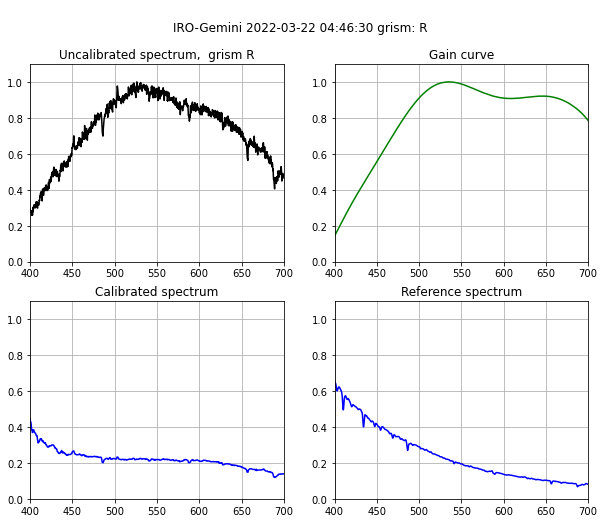

In [13]:
fig = G.plot_2x2(ref_file=ref_file, medavg=9, xlims =[400,700])
plt.show(fig)